<a href="https://colab.research.google.com/github/galua2001/colab/blob/main/mndeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving train.csv to train (1).csv


In [5]:
df=pd.read_csv('/content/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
Y_train

array([8, 6, 0, ..., 5, 1, 9])

In [10]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 8 1 ... 0 5 1] [8 6 0 ... 5 1 9]
0.13397560975609757
Iteration:  10
[5 8 7 ... 0 5 3] [8 6 0 ... 5 1 9]
0.22726829268292684
Iteration:  20
[5 8 7 ... 0 5 3] [8 6 0 ... 5 1 9]
0.3130731707317073
Iteration:  30
[1 8 7 ... 0 1 9] [8 6 0 ... 5 1 9]
0.3806829268292683
Iteration:  40
[1 8 7 ... 0 1 9] [8 6 0 ... 5 1 9]
0.4365121951219512
Iteration:  50
[1 2 7 ... 9 1 9] [8 6 0 ... 5 1 9]
0.4844634146341463
Iteration:  60
[1 2 7 ... 9 1 9] [8 6 0 ... 5 1 9]
0.5231463414634147
Iteration:  70
[1 2 7 ... 9 1 9] [8 6 0 ... 5 1 9]
0.5560731707317074
Iteration:  80
[1 2 7 ... 3 1 9] [8 6 0 ... 5 1 9]
0.5849512195121951
Iteration:  90
[8 2 7 ... 3 1 9] [8 6 0 ... 5 1 9]
0.6111219512195122
Iteration:  100
[8 2 7 ... 3 1 9] [8 6 0 ... 5 1 9]
0.6373170731707317
Iteration:  110
[8 2 7 ... 3 1 9] [8 6 0 ... 5 1 9]
0.6593658536585366
Iteration:  120
[8 2 7 ... 3 1 9] [8 6 0 ... 5 1 9]
0.6798048780487805
Iteration:  130
[8 2 7 ... 3 1 9] [8 6 0 ... 5 1 9]
0.6963414634146341
Iteration:  140

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


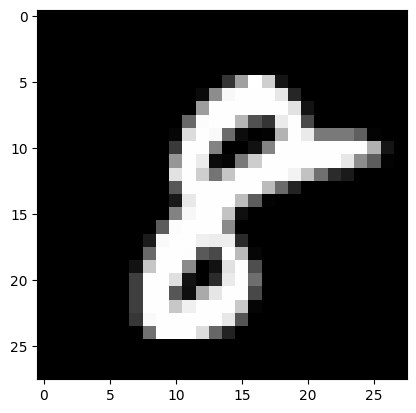

Prediction:  [4]
Label:  6


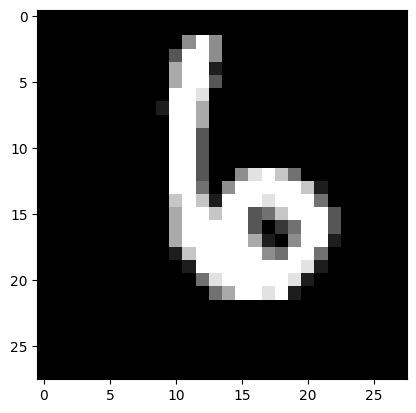

Prediction:  [5]
Label:  0


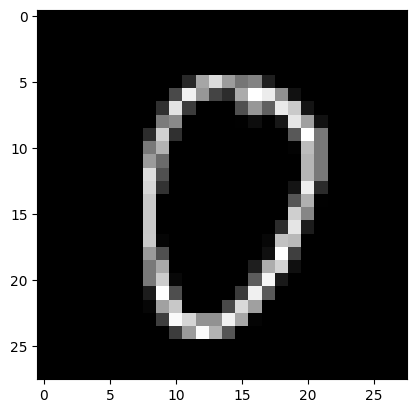

Prediction:  [8]
Label:  8


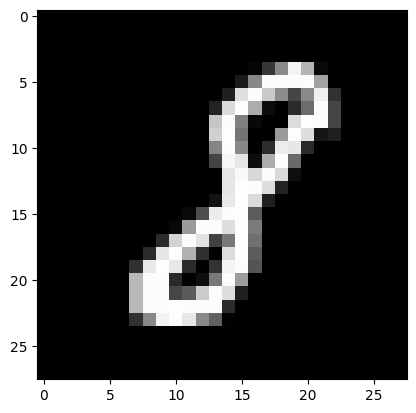

In [20]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [18]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 7 3 2 3 5 4 2 1 3 1 3 6 1 3 7 2 0 4 6 2 9 1 5 9 9 2 6 2 8 3 9 7 6 4 1 8
 0 1 8 4 7 3 9 3 4 8 2 8 5 8 3 9 8 3 4 0 8 1 9 6 6 6 1 0 7 1 4 0 8 2 9 3 0
 8 9 3 8 3 2 1 4 8 5 3 5 0 4 4 8 8 1 3 0 3 1 9 2 7 4 0 9 6 4 9 7 6 2 7 4 4
 9 1 4 8 9 7 7 9 9 0 1 5 5 6 9 3 5 1 6 1 9 2 0 9 2 0 3 5 0 7 4 1 5 9 7 1 3
 5 2 2 4 0 0 7 8 3 2 7 8 0 0 1 0 7 8 7 7 3 2 6 1 7 6 5 1 5 4 6 7 1 7 4 3 0
 2 7 1 1 9 4 2 8 4 0 9 7 8 2 8 5 4 0 5 2 8 1 3 2 0 6 9 3 5 6 4 7 4 4 6 0 5
 9 7 8 0 1 0 5 8 6 7 8 5 9 4 8 9 6 4 4 0 0 1 4 1 5 2 1 1 6 0 9 9 9 8 4 3 7
 2 3 3 4 8 5 4 2 3 6 0 4 3 2 2 1 8 7 2 4 9 9 8 2 5 4 1 9 3 5 0 3 0 9 3 1 4
 7 4 0 4 1 3 0 3 6 2 9 6 1 6 7 0 0 9 9 6 1 0 0 3 3 5 9 7 3 0 4 3 5 4 3 2 9
 7 0 8 0 0 3 2 1 8 1 5 8 7 9 9 2 0 2 5 4 0 3 1 8 4 3 0 5 0 8 8 0 7 9 8 5 6
 8 4 3 7 9 2 0 9 2 0 8 2 7 1 1 6 8 0 3 1 5 4 6 8 9 4 3 3 2 9 2 7 3 5 8 2 3
 1 7 1 6 4 7 7 7 4 5 1 7 3 3 2 8 9 3 8 8 9 3 5 2 2 1 7 4 1 7 0 0 3 4 8 5 7
 1 4 6 0 1 6 7 7 5 8 8 7 8 3 0 6 1 0 4 8 9 6 6 1 9 4 0 0 1 1 1 5 4 4 2 6 9
 2 0 1 7 2 4 8 4 8 5 1 0 

0.853